In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import matplotlib.lines as mlines
from scipy.optimize import curve_fit
import h5py
from pathlib import Path
from collections.abc import Iterable
from matplotlib.colors import LogNorm

In [88]:
datapath = Path.cwd()
figurepath = Path.cwd() / "figures"

In [89]:
W = 5.88    # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W),#/(4/3)),     # 1:1 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 10,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})

In [90]:
def set_size(width='thesis', fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    aspect_ratio = 1#(5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * aspect_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


In [91]:
def rearrange_data(arr): #
    res = np.swapaxes(arr,-1,0)
    res = np.swapaxes(res,-2,1)
    return res[:,:,0,:]

In [92]:
fileRS = "dataRS21.jld2"
fRS = h5py.File(fileRS, "r")
data_RS = fRS["data"]
data_RS = rearrange_data(data_RS)

fileRPS = "dataRPS21.jld2"
fRPS = h5py.File(fileRPS, "r")
data_RPS = fRPS["data"]
data_RPS = rearrange_data(data_RPS)

fileBS = "dataBS21.jld2"
fBS = h5py.File(fileBS, "r")
data_BS = fBS["data"]
data_BS = rearrange_data(data_BS)

In [93]:
T = np.arange(0,3.1,0.1)
Tmax = 21

# Scaling Plot Total Error

In [94]:
file = "mean_std.jld2"
f = h5py.File(file, "r")
mean_std_RS_13 = f["mean_std_RS_13"][()]
mean_std_RPS_13 = f["mean_std_RPS_13"][()]
mean_std_BS_13 = f["mean_std_BS_13"][()]

mean_std_RS_15 = f["mean_std_RS_15"][()]
mean_std_RPS_15 = f["mean_std_RPS_15"][()]
mean_std_BS_15 = f["mean_std_BS_15"][()]

mean_std_RS_17 = f["mean_std_RS_17"][()]
mean_std_RPS_17 = f["mean_std_RPS_17"][()]
mean_std_BS_17 = f["mean_std_BS_17"][()]

mean_std_RS_19 = f["mean_std_RS_19"][()]
mean_std_RPS_19 = f["mean_std_RPS_19"][()]
mean_std_BS_19 = f["mean_std_BS_19"][()]

mean_std_RS_21 = f["mean_std_RS_21"][()]
mean_std_RPS_21 = f["mean_std_RPS_21"][()]
mean_std_BS_21 = f["mean_std_BS_21"][()]

Ns = [13,15,17,19,21]
n_states_RS = np.arange(2,101,1)
n_states = np.arange(2,1001,1)

In [95]:
file2 = "fit_params.jld2"
f = h5py.File(file2, "r")
params_RPS_13 = f["params_RPS_13"][()]
params_BS_13 = f["params_BS_13"][()]

params_RPS_15 = f["params_RPS_15"][()]
params_BS_15 = f["params_BS_15"][()]

params_RPS_17 = f["params_RPS_17"][()]
params_BS_17 = f["params_BS_17"][()]

params_RPS_19 = f["params_RPS_19"][()]
params_BS_19 = f["params_BS_19"][()]

params_RPS_21 = f["params_RPS_21"][()]
params_BS_21 = f["params_BS_21"][()]

In [96]:
def func_13(n):
    return np.exp(params_RPS_13[0]/params_BS_13[0] * np.log(n) + (params_RPS_13[1]-params_BS_13[1])/params_BS_13[0])
	
def func_15(n):
    return np.exp(params_RPS_15[0]/params_BS_15[0] * np.log(n) + (params_RPS_15[1]-params_BS_15[1])/params_BS_15[0])
	
def func_17(n):
    return np.exp(params_RPS_17[0]/params_BS_17[0] * np.log(n) + (params_RPS_17[1]-params_BS_17[1])/params_BS_17[0])
	
def func_19(n):
    return np.exp(params_RPS_19[0]/params_BS_19[0] * np.log(n) + (params_RPS_19[1]-params_BS_19[1])/params_BS_19[0])
	
def func_21(n):
    return np.exp(params_RPS_21[0]/params_BS_21[0] * np.log(n) + (params_RPS_21[1]-params_BS_21[1])/params_BS_21[0])

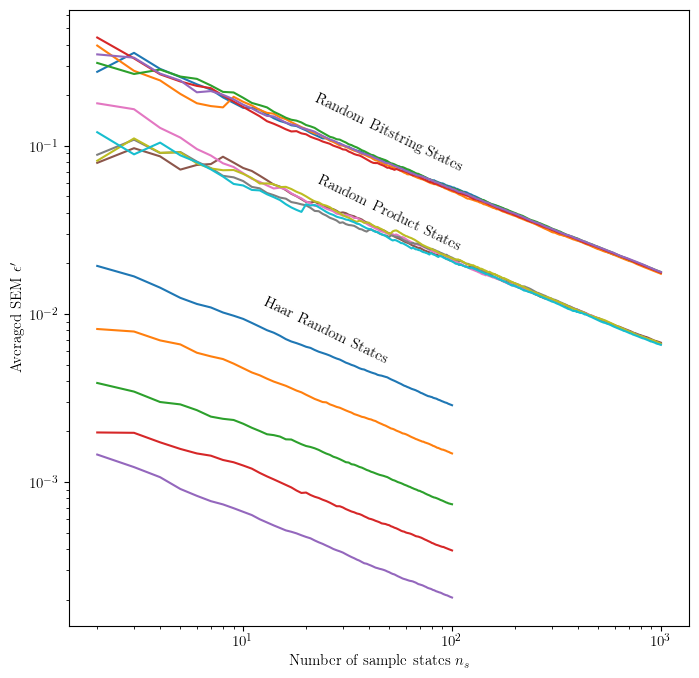

In [97]:
fig = plt.figure(figsize=(8,8))
plt.plot(n_states_RS,mean_std_RS_13)
plt.plot(n_states_RS,mean_std_RS_15)
plt.plot(n_states_RS,mean_std_RS_17)
plt.plot(n_states_RS,mean_std_RS_19)
plt.plot(n_states_RS,mean_std_RS_21)

plt.plot(n_states,mean_std_RPS_13)
plt.plot(n_states,mean_std_RPS_15)
plt.plot(n_states,mean_std_RPS_17)
plt.plot(n_states,mean_std_RPS_19)
plt.plot(n_states,mean_std_RPS_21)

plt.plot(n_states,mean_std_BS_13)
plt.plot(n_states,mean_std_BS_15)
plt.plot(n_states,mean_std_BS_17)
plt.plot(n_states,mean_std_BS_19)
plt.plot(n_states,mean_std_BS_21)
plt.yscale("log")
plt.xscale("log")

plt.ylabel(r"Averaged SEM $\epsilon^\prime$")
plt.xlabel(r"Number of sample states $n_s$")

plt.text(2.5e1,8e-3,"Haar Random States",rotation=np.arctan(-0.48)/(2*np.pi)*360,ha="center",va="center")
plt.text(5e1,4e-2,"Random Product States",rotation=np.arctan(-0.48)/(2*np.pi)*360,ha="center",va="center")
plt.text(5e1,1.2e-1,"Random Bitstring States",rotation=np.arctan(-0.48)/(2*np.pi)*360,ha="center",va="center")
plt.show()

/tmp/ipykernel_299937/2352367925.py:2: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_13[0]/params_BS_13[0] * np.log(n) + (params_RPS_13[1]-params_BS_13[1])/params_BS_13[0])
/tmp/ipykernel_299937/2352367925.py:5: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_15[0]/params_BS_15[0] * np.log(n) + (params_RPS_15[1]-params_BS_15[1])/params_BS_15[0])
/tmp/ipykernel_299937/2352367925.py:8: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_17[0]/params_BS_17[0] * np.log(n) + (params_RPS_17[1]-params_BS_17[1])/params_BS_17[0])
/tmp/ipykernel_299937/2352367925.py:11: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_19[0]/params_BS_19[0] * np.log(n) + (params_RPS_19[1]-params_BS_19[1])/params_BS_19[0])
/tmp/ipykernel_299937/2352367925.py:14: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_21[0]/params_BS_21[0] * np.log(n) + (params_RPS_21[1]-params_BS_21

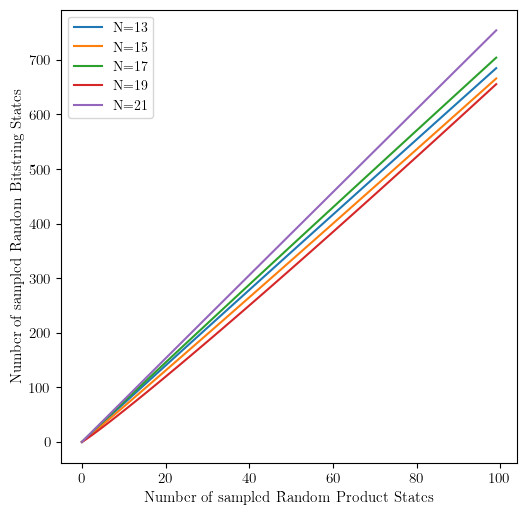

In [98]:
plt.plot(np.arange(0,100,1),func_13(np.arange(0,100,1)),label="N=13")
plt.plot(np.arange(0,100,1),func_15(np.arange(0,100,1)),label="N=15")
plt.plot(np.arange(0,100,1),func_17(np.arange(0,100,1)),label="N=17")
plt.plot(np.arange(0,100,1),func_19(np.arange(0,100,1)),label="N=19")
plt.plot(np.arange(0,100,1),func_21(np.arange(0,100,1)),label="N=21")


plt.xlabel("Number of sampled Random Product States")
plt.ylabel("Number of sampled Random Bitstring States")
plt.legend()

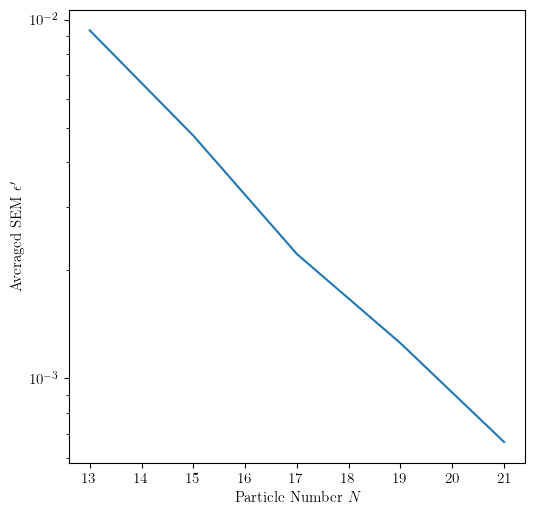

In [99]:
s = 8 # i.e. 10 states
plt.plot([13,15,17,19,21],[mean_std_RS_13[s],mean_std_RS_15[s],mean_std_RS_17[s],mean_std_RS_19[s],mean_std_RS_21[s]])
plt.yscale("log")
plt.ylabel(r"Averaged SEM $\epsilon^\prime$")
plt.xlabel(r"Particle Number $N$")
plt.show()

# Final Plot

/tmp/ipykernel_299937/2352367925.py:2: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_13[0]/params_BS_13[0] * np.log(n) + (params_RPS_13[1]-params_BS_13[1])/params_BS_13[0])
/tmp/ipykernel_299937/2352367925.py:5: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_15[0]/params_BS_15[0] * np.log(n) + (params_RPS_15[1]-params_BS_15[1])/params_BS_15[0])
/tmp/ipykernel_299937/2352367925.py:8: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_17[0]/params_BS_17[0] * np.log(n) + (params_RPS_17[1]-params_BS_17[1])/params_BS_17[0])
/tmp/ipykernel_299937/2352367925.py:11: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_19[0]/params_BS_19[0] * np.log(n) + (params_RPS_19[1]-params_BS_19[1])/params_BS_19[0])
/tmp/ipykernel_299937/2352367925.py:14: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_21[0]/params_BS_21[0] * np.log(n) + (params_RPS_21[1]-params_BS_21

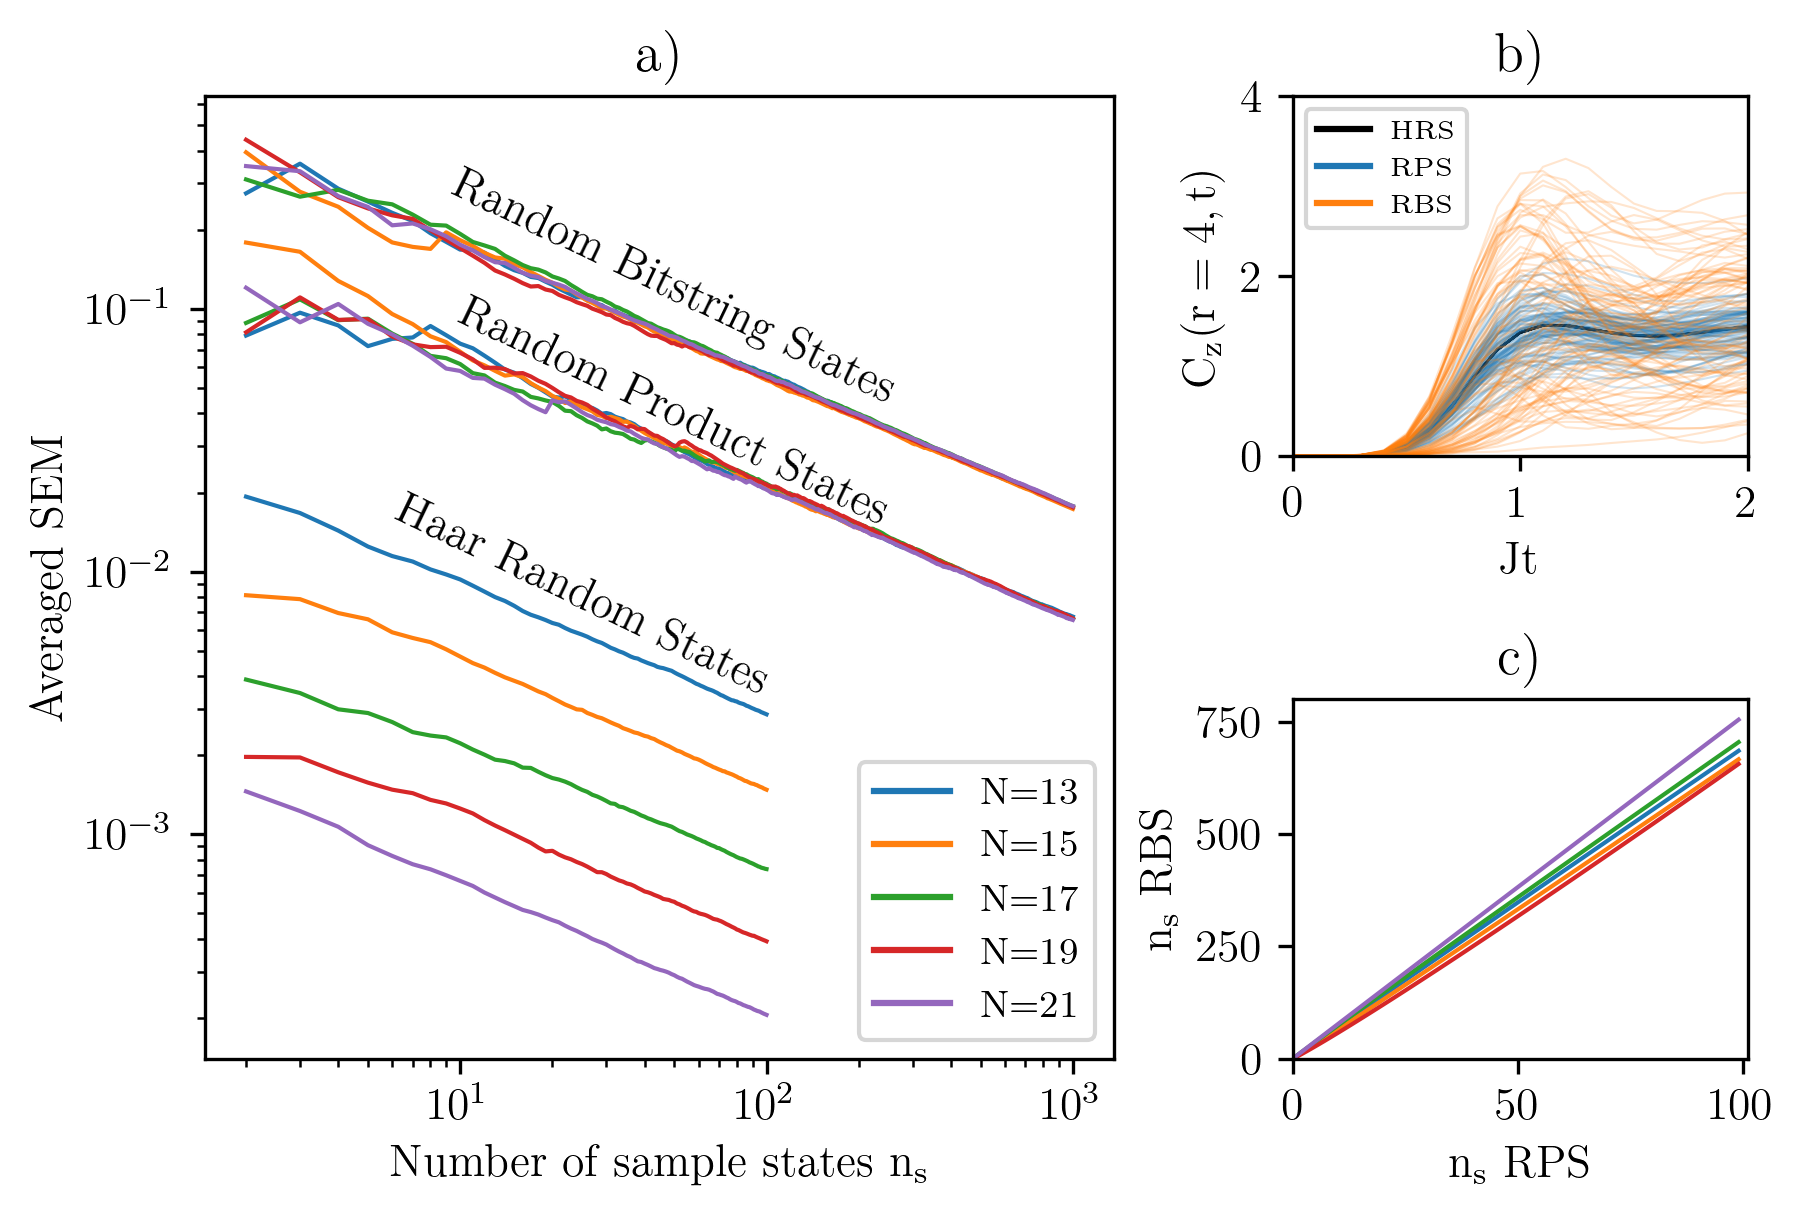

In [129]:
fig = plt.figure(constrained_layout=True,figsize=set_size(subplots=(2,3)),dpi=300)
axs = fig.subplot_mosaic([['Left', 'TopRight'],['Left', 'BottomRight']],
                          gridspec_kw={'width_ratios':[2, 1]})
axs['Left'].set_title('a)')
axs['TopRight'].set_title('b)')
axs['BottomRight'].set_title('c)')

#Left
axs["Left"].plot(n_states_RS,mean_std_RS_13,color="C0",lw=1)
axs["Left"].plot(n_states_RS,mean_std_RS_15,color="C1",lw=1)
axs["Left"].plot(n_states_RS,mean_std_RS_17,color="C2",lw=1)
axs["Left"].plot(n_states_RS,mean_std_RS_19,color="C3",lw=1)
axs["Left"].plot(n_states_RS,mean_std_RS_21,color="C4",lw=1)

axs["Left"].plot(n_states,mean_std_RPS_13,color="C0",lw=1)
axs["Left"].plot(n_states,mean_std_RPS_15,color="C1",lw=1)
axs["Left"].plot(n_states,mean_std_RPS_17,color="C2",lw=1)
axs["Left"].plot(n_states,mean_std_RPS_19,color="C3",lw=1)
axs["Left"].plot(n_states,mean_std_RPS_21,color="C4",lw=1)

axs["Left"].plot(n_states,mean_std_BS_13,color="C0",lw=1)
axs["Left"].plot(n_states,mean_std_BS_15,color="C1",lw=1)
axs["Left"].plot(n_states,mean_std_BS_17,color="C2",lw=1)
axs["Left"].plot(n_states,mean_std_BS_19,color="C3",lw=1)
axs["Left"].plot(n_states,mean_std_BS_21,color="C4",lw=1)
axs["Left"].set_yscale("log")
axs["Left"].set_xscale("log")

axs["Left"].set_ylabel(r"Averaged SEM")
axs["Left"].set_xlabel(r"Number of sample states $\mathrm{n_s}$")

axs["Left"].text(2.5e1,8e-3,"Haar Random States",rotation=np.arctan(-0.48)/(2*np.pi)*360,ha="center",va="center")
axs["Left"].text(5e1,4e-2,"Random Product States",rotation=np.arctan(-0.48)/(2*np.pi)*360,ha="center",va="center")
axs["Left"].text(5e1,1.2e-1,"Random Bitstring States",rotation=np.arctan(-0.48)/(2*np.pi)*360,ha="center",va="center")

line0 = mlines.Line2D([], [], color='C0', label="N=13")
line1 = mlines.Line2D([], [], color='C1', label="N=15")
line2 = mlines.Line2D([], [], color='C2', label="N=17")
line3 = mlines.Line2D([], [], color='C3', label="N=19")
line4 = mlines.Line2D([], [], color='C4', label="N=21")

axs["Left"].legend(handles = [line0,line1,line2,line3,line4],fontsize="small",loc="lower right")


#TopRight
j = 6
for s in range(data_RS.shape[-1]):
    axs["TopRight"].plot(T[0:Tmax],data_RS[0:Tmax,j,s],lw=0.5,c="black",alpha=0.2)
for s in range(data_RS.shape[-1]):
    axs["TopRight"].plot(T[0:Tmax],data_RPS[0:Tmax,j,s],lw=0.5,c="C0",alpha=0.2)
for s in range(data_RS.shape[-1]):
    axs["TopRight"].plot(T[0:Tmax],data_BS[0:Tmax,j,s],lw=0.5,c="C1",alpha=0.2)

lineRS = mlines.Line2D([], [], color='black', label="HRS")
lineRPS = mlines.Line2D([], [], color='C0', label="RPS")
lineBS = mlines.Line2D([], [], color='C1', label="RBS")

axs["TopRight"].legend(handles = [lineRS,lineRPS,lineBS],fontsize="xx-small",loc="best")

axs["TopRight"].set_xlim(0,2)
axs["TopRight"].set_ylim(0,4)
axs["TopRight"].set_yticks([0,2,4])
axs["TopRight"].set_xlabel("Jt")
axs["TopRight"].set_ylabel(r"$\mathrm{C_z(r=4,t)}$")

#BottomRight
axs["BottomRight"].plot(np.arange(0,100,1),func_13(np.arange(0,100,1)),label="N=13",color="C0",lw=1)
axs["BottomRight"].plot(np.arange(0,100,1),func_15(np.arange(0,100,1)),label="N=15",color="C1",lw=1)
axs["BottomRight"].plot(np.arange(0,100,1),func_17(np.arange(0,100,1)),label="N=17",color="C2",lw=1)
axs["BottomRight"].plot(np.arange(0,100,1),func_19(np.arange(0,100,1)),label="N=19",color="C3",lw=1)
axs["BottomRight"].plot(np.arange(0,100,1),func_21(np.arange(0,100,1)),label="N=21",color="C4",lw=1)


axs["BottomRight"].set_xlabel(r"$\mathrm{n_{s}}$ RPS")
axs["BottomRight"].set_ylabel(r"$\mathrm{n_{s}}$ RBS")
axs["BottomRight"].set_yticks([0,250,500,750])

axs["BottomRight"].set_xlim(0,101)
axs["BottomRight"].set_ylim(0,800)

plt.savefig(figurepath/"scalings.png",format="png",bbox_inches='tight',dpi=600)
plt.show()